In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix as cm,classification_report

In [2]:
wine_data=pd.read_csv("C:/Users/radhi/Downloads/WineQT.csv")
print(wine_data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

In [3]:
wine_data.shape

(1143, 13)

In [4]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [6]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [7]:
wine_data['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [8]:
duplicates=wine_data.duplicated().sum()
print(duplicates)
#wine_data.drop_duplicates(inplace=True)
#wine_data.shape

0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


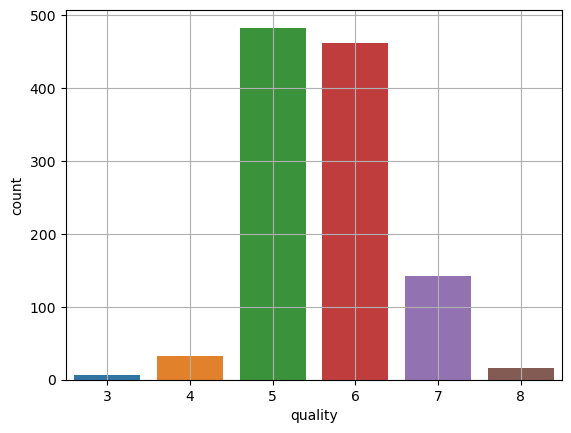

In [9]:
#data visualization
sns.countplot(wine_data['quality'])
plt.grid()
plt.show()

In [10]:
#correlation matrix
wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


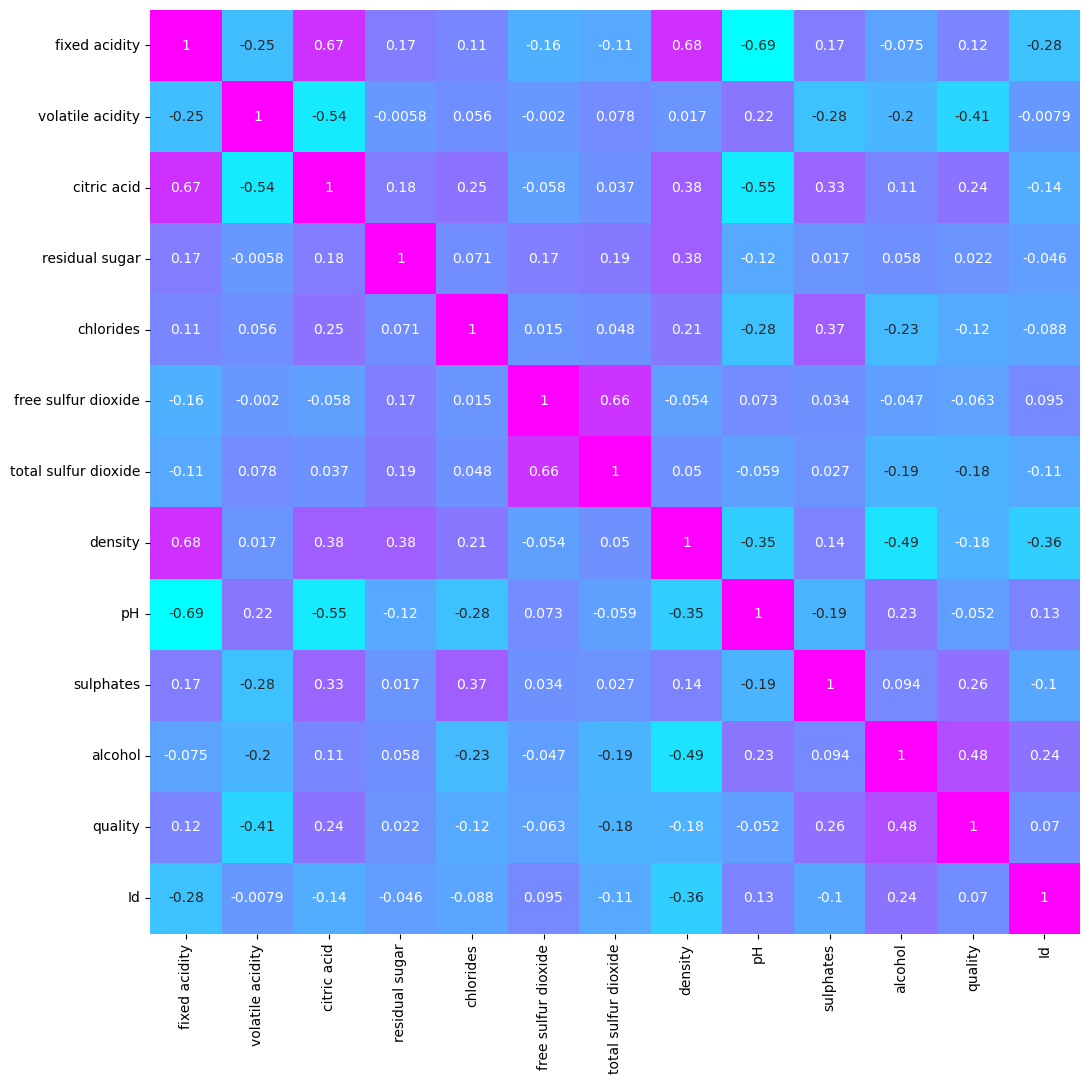

In [11]:
corr=wine_data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True,cbar=False,cmap='cool')
plt.show()

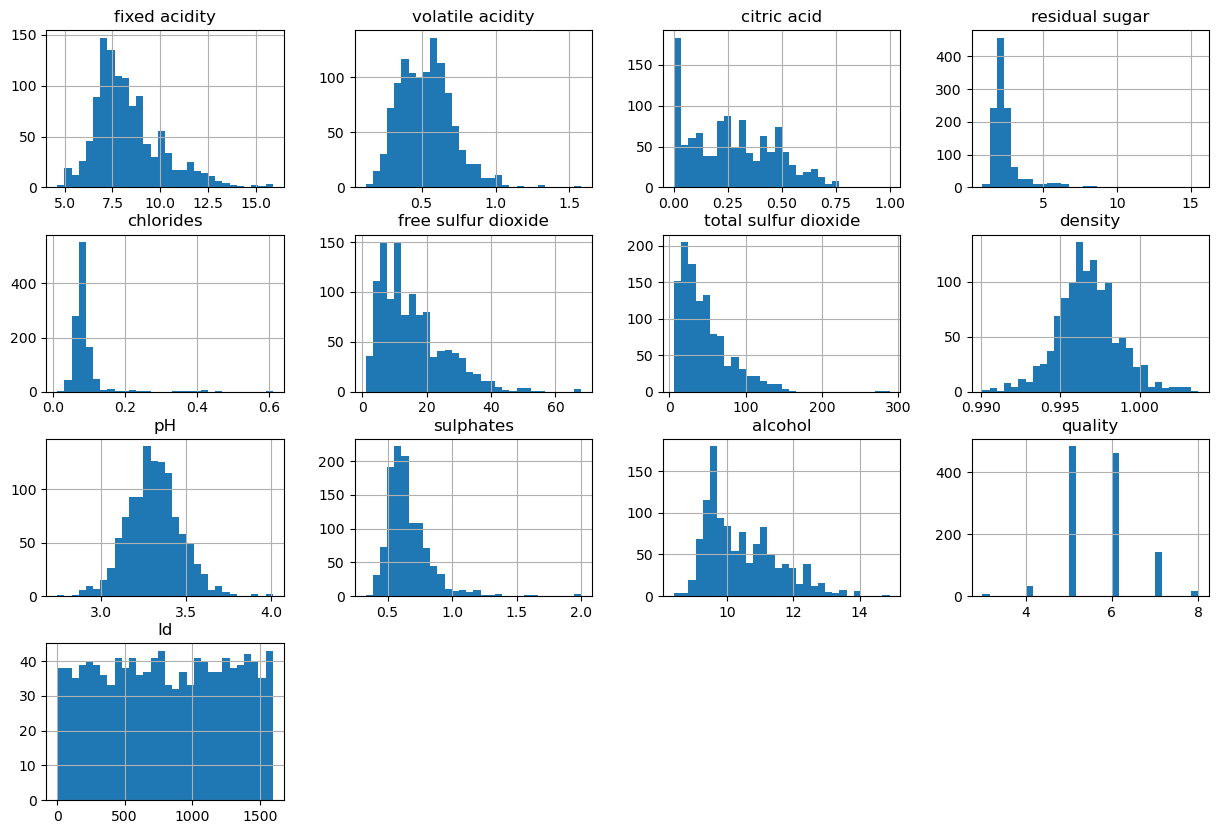

In [12]:
wine_data.hist(bins=30,figsize=(15,10))
plt.show()

In [13]:
#split the data
x=wine_data.drop(columns='quality',axis=1)
print(x)
print(x.shape)
wine_data['quality']=[1 if x>5 else 0 for x in wine_data.quality]
y=wine_data['quality']

wine_data['quality'].value_counts()

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

1    621
0    522
Name: quality, dtype: int64

In [14]:
print(y)

0       0
1       0
2       0
3       1
4       0
       ..
1138    1
1139    1
1140    0
1141    1
1142    0
Name: quality, Length: 1143, dtype: int64


In [15]:
# standard scaling
#from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sd=sc.fit_transform(x)
print(sd)

[[-0.52157961  0.93933222 -1.36502663 ... -0.57365783 -0.96338181
  -1.73561799]
 [-0.29259344  1.94181282 -1.36502663 ...  0.1308811  -0.59360107
  -1.73346186]
 [-0.29259344  1.27349242 -1.16156762 ... -0.04525363 -0.59360107
  -1.73130573]
 ...
 [-1.20853813  0.38239855 -0.9581086  ... -0.45623467  0.05351522
   1.70125196]
 [-1.38027776  0.10393172 -0.8563791  ...  0.60057372  0.70063152
   1.70340809]
 [-1.38027776  0.6330187  -0.75464959 ...  0.30701583 -0.22382033
   1.70772035]]


In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(sd,1) for i in range(sd.shape[1])]
vif['features']=x.columns
vif  

,vif,features
0,1.779962,fixed acidity
1,1.779962,volatile acidity
2,1.779962,citric acid
3,1.779962,residual sugar
4,1.779962,chlorides
5,1.779962,free sulfur dioxide
6,1.779962,total sulfur dioxide
7,1.779962,density
8,1.779962,pH
9,1.779962,sulphates


In [17]:
#scaling:1)Normalizer
#        2)StandardScaler
#        2)MinMax scaler
#        3)Binarizer

In [18]:
sd.shape


(1143, 12)

In [19]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)
print(x_train.shape,x_test.shape)

(1028, 12) (115, 12)


In [20]:
model=LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [21]:
train_pred=model.predict(x_train)
error_score=mean_squared_error(y_train,train_pred)
print(error_score)

0.1714121495269138


In [22]:
test_pred=model.predict(x_test)
error_score=mean_squared_error(y_test,test_pred)
print(error_score)

0.185054330086394


In [23]:
mae = mean_absolute_error(y_test, test_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.3690595888238421


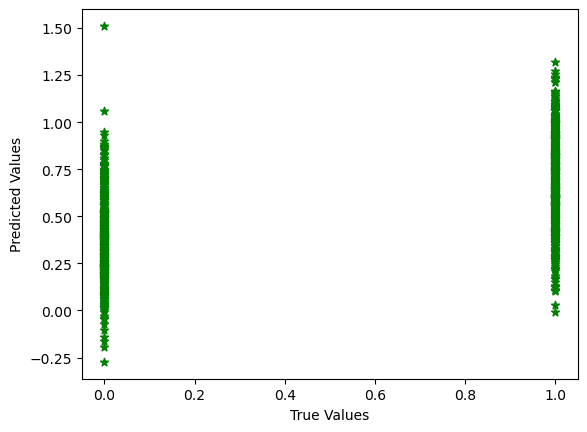

In [24]:
plt.scatter(y_train,train_pred,marker='*',c='g')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

In [25]:
#testing the model with testing data


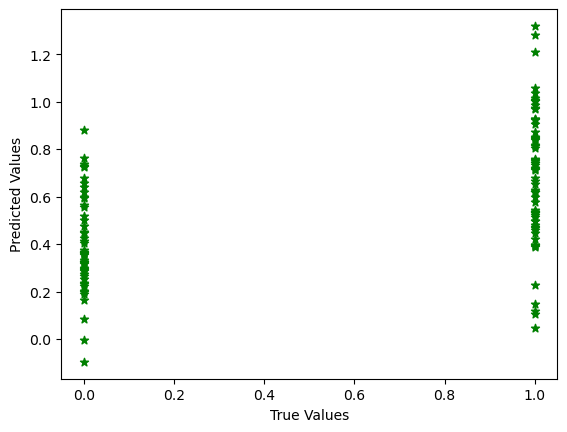

In [26]:
plt.scatter(y_test,test_pred,marker='*',c='g')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

In [30]:
input=(7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,2)
input_as_array=np.asarray(input)
input_as_array_reshape=input_as_array.reshape(1,-1)
pred=model.predict(input_as_array_reshape)
print('prediction',np.rint(pred))

prediction [0.]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [321]:
print(y_test)

158     0
1081    1
291     0
538     1
367     1
       ..
208     1
530     0
306     0
674     0
741     1
Name: quality, Length: 115, dtype: int64


In [322]:

print(test_pred)

test_pred=test_pred.astype(int)

[ 0.41410122  0.10408784  0.29341976  0.22740516  0.84676653  1.01734211
  0.36048667  0.16383184  0.62824251  0.3325502   0.84947202  0.9246095
  0.396467    0.84029452  0.72796908  0.0462286   0.55649191  0.59763318
  0.45097943  0.96967776  0.75942937  0.73332504  0.22462357  1.00531096
  0.51283236  0.25121882  1.00237276  0.7410181   0.18791178  0.53270503
  0.87102237  0.49911947  1.03790035  0.59227163  0.49536068  0.23267284
  0.46602191  0.75451742  1.27950285  0.88078975  0.97500546  0.36188971
  1.3187951   0.35856512  0.29168481  0.27614247  0.54315532  0.65351532
 -0.09614426  0.61864325  0.92592527  0.35593304  0.53630557  0.66726165
  0.61850299  0.90467405  0.47138027  0.63858885  0.721737    0.36478427
  0.42496818  0.75076311  0.51924845  0.92535552  0.81299802  0.38871953
  1.21073706  0.3234402  -0.00226537  0.72327291  0.53523722  0.40434894
  0.60017865  0.80636837  0.3245296   0.31751074  0.68016657  0.65860522
  0.47765429  0.45812306  0.37533346  0.52972292  0.

In [323]:
classification_rep = classification_report(y_test,test_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.46      1.00      0.63        49
           1       1.00      0.14      0.24        66

    accuracy                           0.50       115
   macro avg       0.73      0.57      0.44       115
weighted avg       0.77      0.50      0.41       115



In [324]:
my_cm=cm(y_test,test_pred)
print(my_cm)


[[49  0]
 [57  9]]
